# <font color='Green'> Image Classification with CNN for CIFAR_10 Data</font>

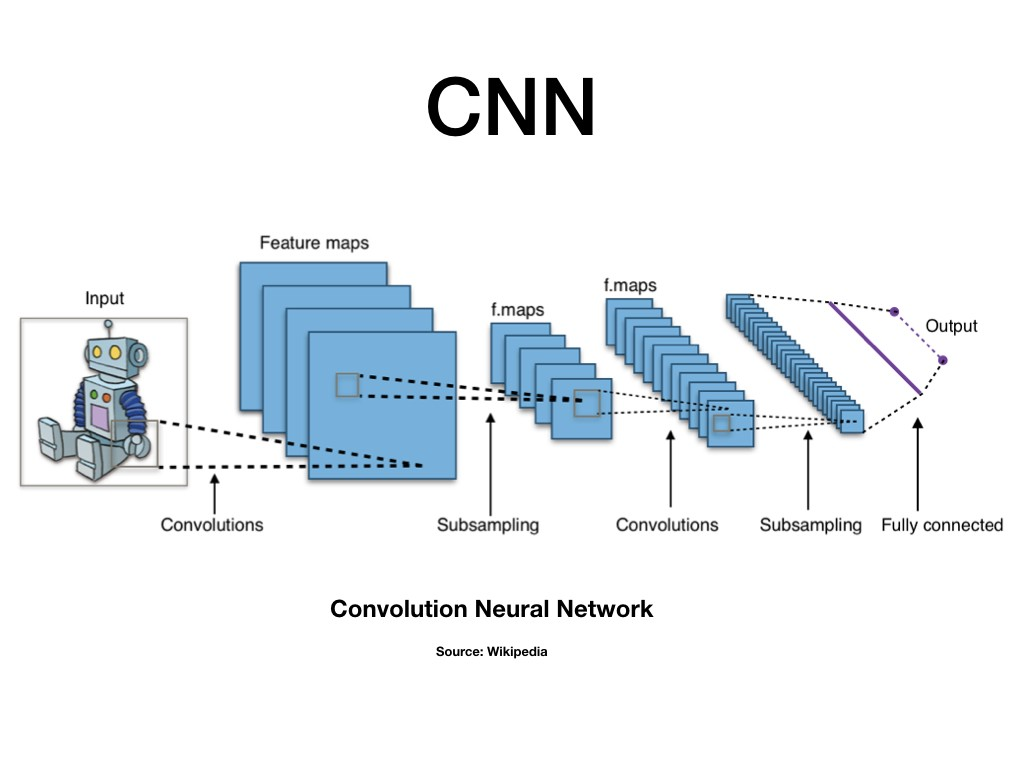

# IMPORT LIBRARY

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.image import imread
import warnings
warnings.filterwarnings('ignore')

# LOAD DATA  AND DATA VISUALIZATİON

In [4]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
class_names = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

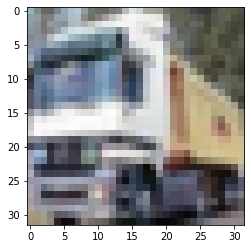

In [32]:
plt.imshow(X_train[1])


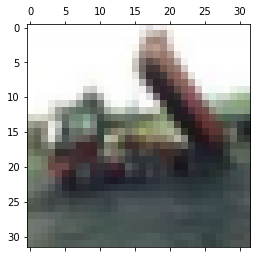

In [31]:
plt.matshow(X_train[2],cmap='gray')


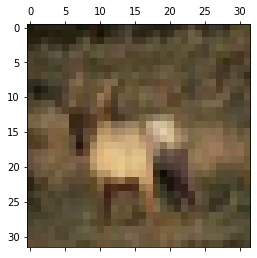

In [33]:
plt.matshow(X_train[3])

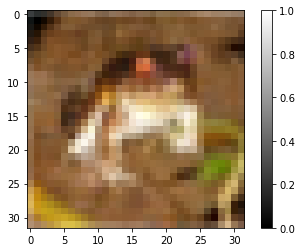

In [34]:
plt.figure()
plt.imshow(X_train[0],cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

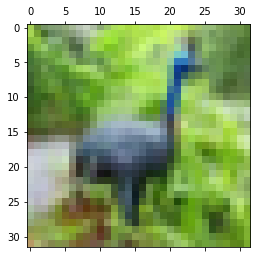

In [35]:
plt.matshow(X_train[6])


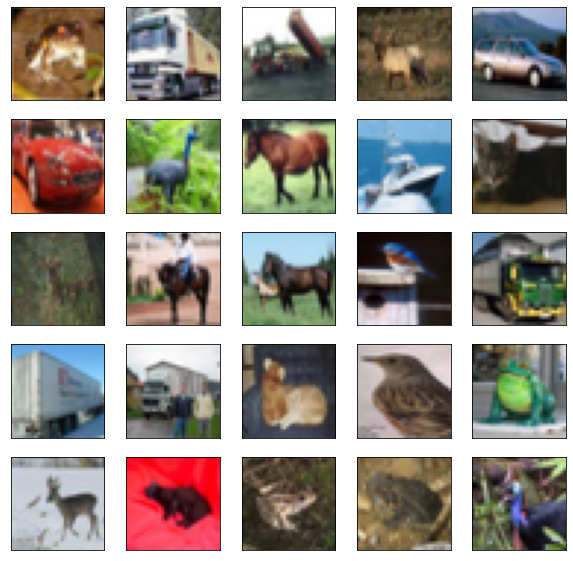

In [36]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
plt.show()

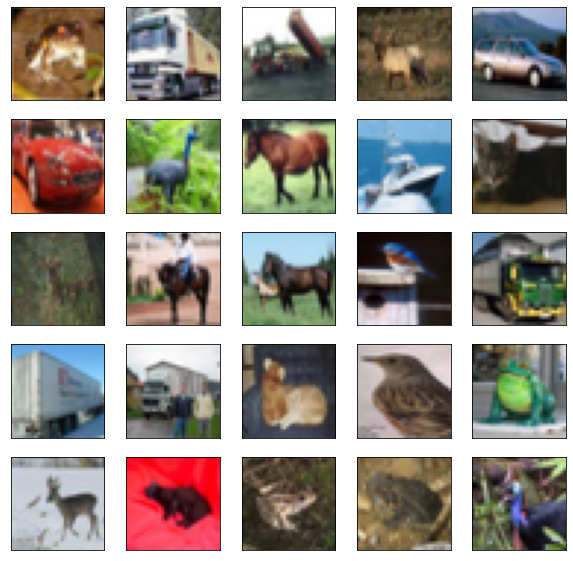

In [37]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i],cmap=plt.cm.binary)
plt.show()

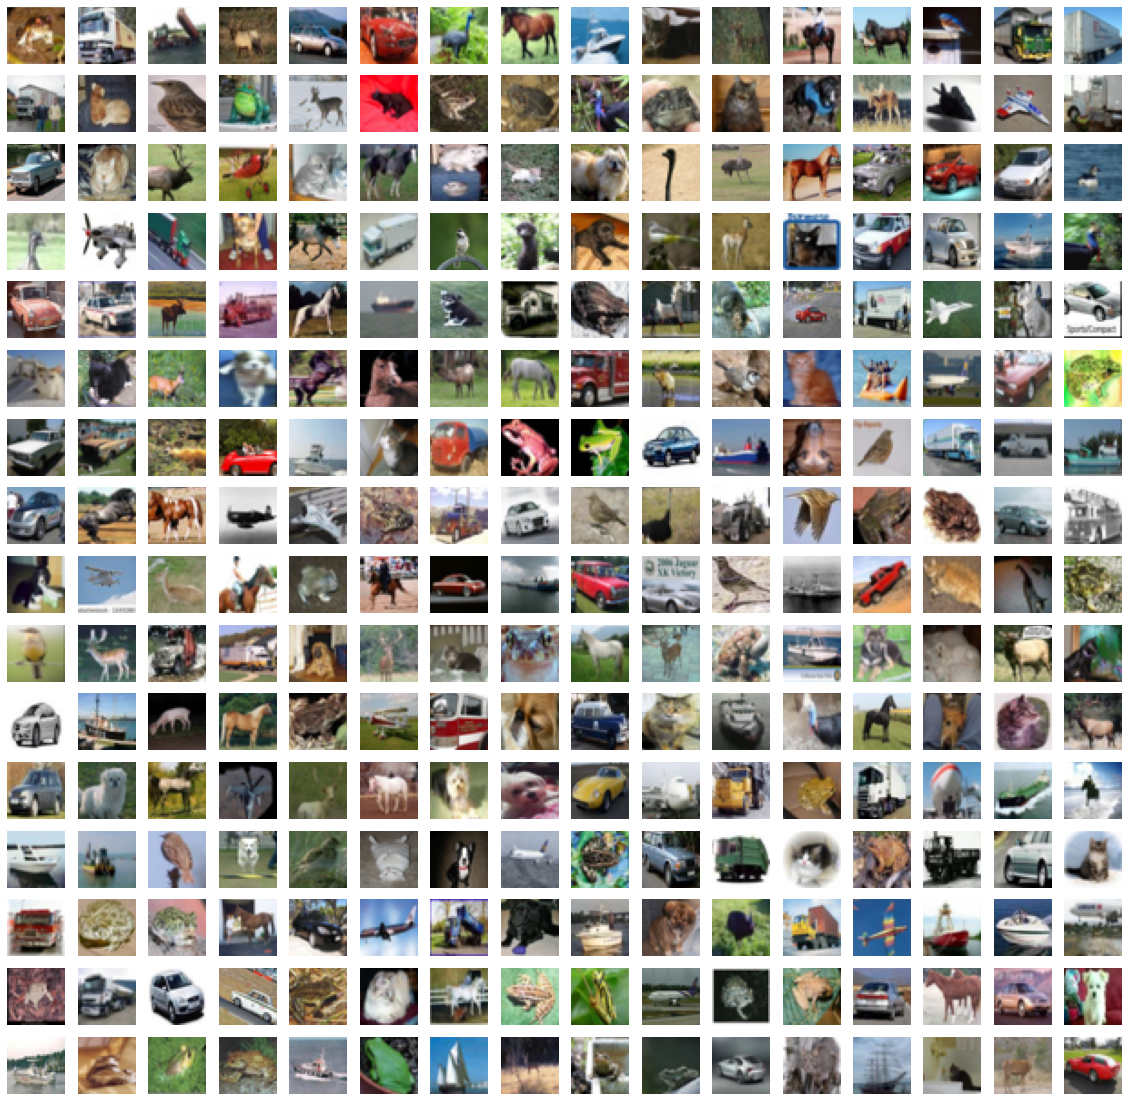

In [15]:
plt.figure(figsize= (20,20))
for i in range(256):
    plt.subplot(16,16,i+1)
    plt.axis('off')
    plt.imshow(X_train[i])

# Standartization

In [16]:
X_train.min()

0

In [17]:
X_train.max()

255

In [18]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [19]:
X_train.min()


0.0

In [20]:
X_train.max()

1.0

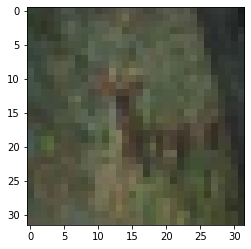

In [21]:
plt.imshow(X_train[10])

In [38]:
X_train = X_train.reshape(X_train.shape[0],32, 32,3, 1)# reshape the X into 4 dimension
X_test = X_test.reshape(X_test.shape[0], 32,32,3, 1)

In [39]:
X_train.shape, X_test.shape

((50000, 32, 32, 3, 1), (10000, 32, 32, 3, 1))

In [40]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [41]:
from tensorflow.keras.utils import to_categorical

In [42]:
Y_train = to_categorical(y_train, 10) # convert the y_train and y_test values to be one-hot encoded for categorical analysis.
Y_test = to_categorical(y_test, 10)
Y_test.shape

(10000, 10)

# Model Building

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [56]:
#Define the model architecture
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(32, 32,3), activation='relu', strides=(1,1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
#Train the digit classification model
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
#CNN -Convolutional Neural Networks


In [57]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 7200)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               921728    
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 923,914
Trainable params: 923,914
Non-trainable params: 0
________________________________________________

# Model Training

In [58]:
from tensorflow.keras.callbacks import EarlyStopping
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test,Y_test))

Epoch 1/10
1563/1563 [==============================] - 38s 23ms/step - loss: 1.4989 - accuracy: 0.4692 - val_loss: 1.2905 - val_accuracy: 0.5473
Epoch 2/10
1563/1563 [==============================] - 32s 21ms/step - loss: 1.1838 - accuracy: 0.5865 - val_loss: 1.2096 - val_accuracy: 0.5745
Epoch 3/10
1563/1563 [==============================] - 32s 20ms/step - loss: 1.0491 - accuracy: 0.6364 - val_loss: 1.1628 - val_accuracy: 0.6025
Epoch 4/10
1563/1563 [==============================] - 32s 21ms/step - loss: 0.9549 - accuracy: 0.6698 - val_loss: 1.1546 - val_accuracy: 0.6031
Epoch 5/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8743 - accuracy: 0.6990 - val_loss: 1.2674 - val_accuracy: 0.5896
Epoch 6/10
1563/1563 [==============================] - 32s 21ms/step - loss: 0.8051 - accuracy: 0.7234 - val_loss: 1.0566 - val_accuracy: 0.6413
Epoch 7/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.7350 - accuracy: 0.7465 - val_loss: 1.0721 -

In [59]:
model.metrics_names

['loss', 'accuracy']

In [60]:
summary = pd.DataFrame(model.history.history)
summary

,loss,accuracy,val_loss,val_accuracy
0,1.498944,0.46924,1.290519,0.5473
1,1.183782,0.58654,1.209584,0.5745
2,1.049076,0.63644,1.162807,0.6025
3,0.954925,0.66976,1.154625,0.6031
4,0.874327,0.69896,1.267441,0.5896
5,0.805051,0.72344,1.056612,0.6413
6,0.735046,0.74652,1.072134,0.6521
7,0.672706,0.76888,1.169220,0.6339
8,0.612646,0.78892,1.173473,0.6443
9,0.559199,0.80946,1.152196,0.6536


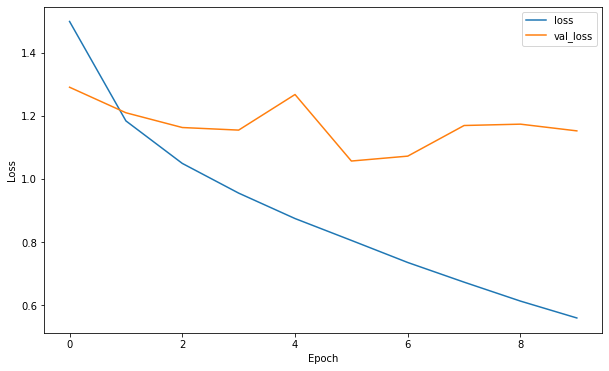

In [61]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

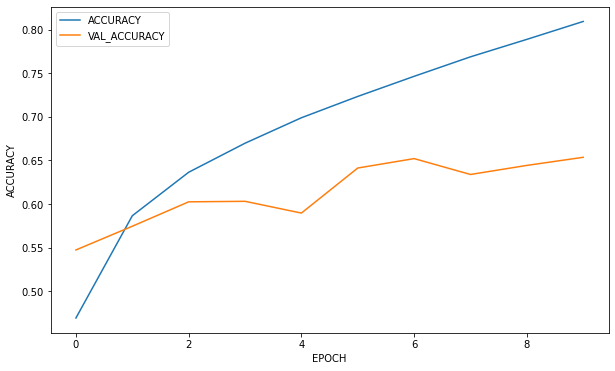

In [62]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="ACCURACY")
plt.plot(summary.val_accuracy, label="VAL_ACCURACY")
plt.legend(loc="upper left")
plt.ylabel("ACCURACY")
plt.xlabel("EPOCH")
plt.show()


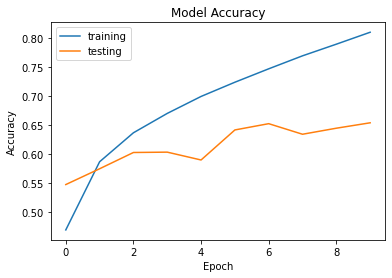

In [63]:
fig1=plt.figure(1)
plt.plot(summary['accuracy'])
plt.plot(summary['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training','testing'],loc='upper left')

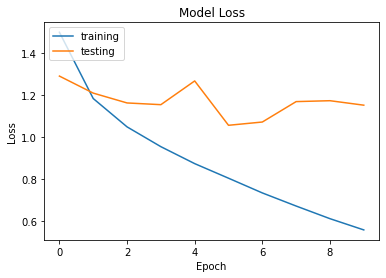

In [64]:
fig2=plt.figure(2)
plt.plot(summary['loss'])
plt.plot(summary['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['training','testing'],loc='upper left')

plt.show()

In [65]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [69]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(32,32,3), activation='relu', strides=(1,1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(metrics=['accuracy'],loss='categorical_crossentropy',optimizer='rmsprop')
#3 seçenek varsa p n nötr gibi crossentropy,2 seçenek varsa binary_crossentropy yazacaz

In [70]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 7200)              0         
                                                                 
 dense_10 (Dense)            (None, 128)               921728    
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 923,914
Trainable params: 923,914
Non-trainable params: 0
________________________________________________

In [71]:
model.fit(X_train, Y_train, batch_size=32, epochs=20, validation_data=(X_test,Y_test),callbacks=[early_stop])
#150 defa git gel yapmak yerine en çok tekrar eden accuracy de duruyor 79 79 79 79 diye dewam ediyorsa  orda sabitliyor bu ve al

Epoch 1/20
1563/1563 [==============================] - 34s 21ms/step - loss: 1.4857 - accuracy: 0.4717 - val_loss: 1.4530 - val_accuracy: 0.4928
Epoch 2/20
1563/1563 [==============================] - 32s 21ms/step - loss: 1.1724 - accuracy: 0.5905 - val_loss: 1.1555 - val_accuracy: 0.6001
Epoch 3/20
1563/1563 [==============================] - 32s 21ms/step - loss: 1.0394 - accuracy: 0.6393 - val_loss: 1.1245 - val_accuracy: 0.6141
Epoch 4/20
1563/1563 [==============================] - 32s 20ms/step - loss: 0.9405 - accuracy: 0.6741 - val_loss: 1.0439 - val_accuracy: 0.6377
Epoch 5/20
1563/1563 [==============================] - 32s 21ms/step - loss: 0.8629 - accuracy: 0.7006 - val_loss: 1.0829 - val_accuracy: 0.6353
Epoch 6/20
1563/1563 [==============================] - 33s 21ms/step - loss: 0.7974 - accuracy: 0.7275 - val_loss: 1.0807 - val_accuracy: 0.6354


In [72]:
summary = pd.DataFrame(model.history.history)
summary

,loss,accuracy,val_loss,val_accuracy
0,1.485740,0.47166,1.452964,0.4928
1,1.172355,0.59054,1.155489,0.6001
2,1.039406,0.63928,1.124522,0.6141
3,0.940492,0.67414,1.043891,0.6377
4,0.862905,0.70060,1.082927,0.6353
5,0.797356,0.72748,1.080700,0.6354


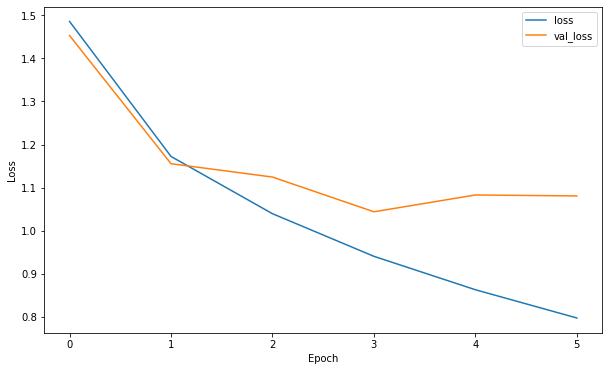

In [73]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

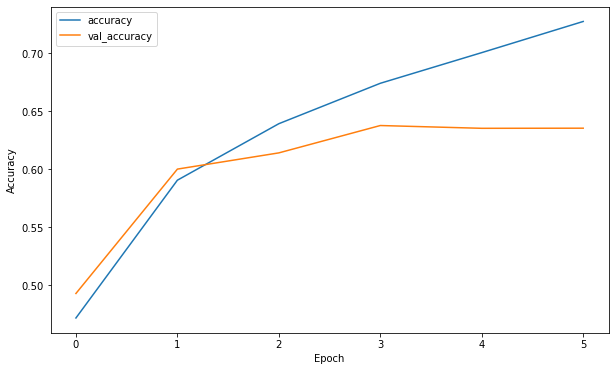

In [74]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

# Model Evaluation

In [75]:
print(model.evaluate(X_test,Y_test,verbose=1))

313/313 [==============================] - 1s 4ms/step - loss: 1.0807 - accuracy: 0.6354
[1.0806995630264282, 0.6353999972343445]


In [76]:
from sklearn.metrics import classification_report,confusion_matrix, plot_confusion_matrix
preds = model.predict(X_test)

313/313 [==============================] - 1s 4ms/step


In [77]:
predictions= np.argmax(preds, axis=1)
predictions

array([3, 1, 0, ..., 5, 1, 7], dtype=int64)

In [78]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.62      0.76      0.68      1000
           1       0.78      0.78      0.78      1000
           2       0.52      0.53      0.52      1000
           3       0.39      0.53      0.45      1000
           4       0.75      0.38      0.50      1000
           5       0.48      0.60      0.53      1000
           6       0.68      0.74      0.71      1000
           7       0.73      0.69      0.71      1000
           8       0.85      0.67      0.75      1000
           9       0.80      0.68      0.73      1000

    accuracy                           0.64     10000
   macro avg       0.66      0.64      0.64     10000
weighted avg       0.66      0.64      0.64     10000



In [79]:
print(confusion_matrix(y_test, predictions))


[[756  19  80  35   9  12  12  10  37  30]
 [ 48 780  12  25   0   9  11   5  23  87]
 [ 68  11 530 109  42 104  74  52   7   3]
 [ 23   7  70 525  22 237  72  34   3   7]
 [ 35   3 141 156 378  81 121  73  10   2]
 [ 15   3  79 211  17 602  30  36   6   1]
 [  7   6  45 123  13  46 742  11   3   4]
 [ 26   5  39  76  23 118   9 695   3   6]
 [160  51  18  38   1  13  11   9 671  28]
 [ 74 111  12  39   2  29  12  24  22 675]]


In [80]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.0806995630264282
Test accuracy: 0.6353999972343445


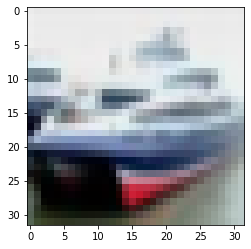

In [84]:
my_image = X_test[1]
plt.imshow(my_image.reshape(32,32,3))   


In [85]:
model.predict(my_image.reshape(1,32,32,3))

1/1 [==============================] - 0s 84ms/step


array([[1.0788290e-02, 8.4105831e-01, 1.4589490e-06, 7.6655567e-07,
        7.1178370e-08, 4.6968736e-08, 9.3937388e-07, 1.3083761e-08,
        1.4677595e-01, 1.3741630e-03]], dtype=float32)

In [86]:
np.argmax(model.predict(my_image.reshape(1,32,32,3)), axis=1)

1/1 [==============================] - 0s 32ms/step


array([1], dtype=int64)

# Model Saving

In [87]:
#Machine learning fotmatında save etme
#serialize model to JSON
model_json=model.to_json()
with open("model_mnist.json","w") as json_file:
    json_file.write(model_json)
    
#seriakize weights to HDF5
model.save_weights("model_mnist.h5")
print("Saved model to disk")

Saved model to disk
